### Adicionar infos do trabalho

### import libraries

In [72]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"On device: {device}")

On device: cuda


### Load data file

In [73]:
df = pd.read_csv("../data/diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [74]:
df["Diabetes_012"].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

#### Transforme dataset to binary classification problem

In [75]:
df = df[df["Diabetes_012"] != 1.0]

In [76]:
df["Diabetes_012"].value_counts()

Diabetes_012
0.0    213703
2.0     35346
Name: count, dtype: int64

In [77]:
df["Diabetes_012"] = df["Diabetes_012"].replace({2.0: 1.0})

/tmp/ipykernel_12796/1443849391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diabetes_012"] = df["Diabetes_012"].replace({2.0: 1.0})


#### Split data and stratify
#### Normalize numerical columns

In [78]:
scaler = MinMaxScaler()

for col in df.columns:

    if df[col].nunique() > 2:

        df[col] = scaler.fit_transform(df[[col]]).flatten()

/tmp/ipykernel_12796/4029563788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]]).flatten()
/tmp/ipykernel_12796/4029563788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]]).flatten()
/tmp/ipykernel_12796/4029563788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [79]:
data_array = df.to_numpy()
target_array = df["Diabetes_012"].to_numpy()

In [80]:
train_data, test_data = train_test_split(data_array, test_size=.1, random_state=27, stratify=target_array)
print(f"Divided dataset {len(train_data)}, {len(test_data)}")

target_train = train_data.T[0]
train_data, validation_data = train_test_split(train_data, test_size=.1, random_state=27, stratify=target_train)

ytrain = train_data.T[0]
ytest = test_data.T[0]
yvalid = validation_data.T[0]

print(f"Check if train, validation and test were correctly stratified: {len([value for value in ytrain if value==1]) / len(ytrain)}, {len([value for value in yvalid if value==1]) / len(yvalid)}, {len([value for value in ytest if value==1]) / len(ytest)}")

Divided dataset 224144, 24905
Check if train, validation and test were correctly stratified: 0.14192307501648252, 0.14191389694401071, 0.1419393696044971


In [81]:
class Data(Dataset):
    
    def __init__(self, data, targets):

        if (type(data) != np.ndarray) and (type(targets) != np.ndarray):
            self.data = data.to_numpy()
            self.targets = targets.to_numpy()
        else:

            self.data = data
            self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.from_numpy(np.array(self.data[idx])).float(), torch.from_numpy(np.array(self.targets[idx])).float()


train_dataset = Data(train_data, ytrain)
val_dataset = Data(validation_data, yvalid)
test_dataset = Data(test_data, ytest)

In [82]:

batch_size = 256

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Create model

In [83]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, layers, lr=0.001):
        super(MLP, self).__init__()
        all_layers = []
        prev_dim = input_dim

        # Camadas ocultas
        for layer_dim in layers:
            all_layers.append(nn.Linear(prev_dim, layer_dim))
            all_layers.append(nn.ReLU())
            prev_dim = layer_dim

        # Camada de saída (ativação linear - regressão)
        all_layers.append(nn.Linear(prev_dim, output_dim))
        all_layers.append(nn.Sigmoid())

        # Combinando as camadas
        self.layers = nn.Sequential(*all_layers)

        self.criterion = nn.L1Loss() #nn.MSELoss()
        self.optimizer = optim.SGD(self.parameters(), lr=lr)

    def forward(self, x):
        return self.layers(x)
    
    def train_model(self, dataloader):
        self.train()
        total_loss = 0
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            self.optimizer.zero_grad()
            outputs = self.forward(batch_x)
            # print(f"Output: {len(outputs)}, batch_y: {len(batch_y)}")
            loss = self.criterion(outputs.view(outputs.shape[0]), batch_y)
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()
        return total_loss / len(dataloader)

    def validate_model(self, dataloader):
        self.eval()
        total_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = self(batch_x)
                loss = self.criterion(outputs.view(outputs.shape[0]), batch_y)
                total_loss += loss.item()
        return total_loss / len(dataloader)

    def test_model(self, dataloader):
        self.eval()
        predictions = []
        targets = []
        total_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = self.forward(batch_x)
                loss = self.criterion(outputs.view(outputs.shape[0]), batch_y)
                total_loss += loss.item()
                predictions.append(outputs.cpu().tolist())
                targets.append(batch_y.cpu().tolist())
        return torch.tensor(predictions).flatten(), torch.tensor(targets).flatten(), total_loss / len(dataloader)

    def predict(self, dataloader):
        self.eval()
        predictions = []
        with torch.no_grad():
            for batch_x, _ in dataloader:
                batch_x = batch_x.to(device)
                outputs = self(batch_x)
                predictions.extend(outputs.cpu().tolist())
        return predictions

In [84]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0.05):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss


In [85]:
num_epochs = 1000
learning_rate = 0.001
# Definição do Modelo
model = MLP(input_dim=df.shape[1], output_dim=1, layers=[21, 12, 6, 3], lr=learning_rate).to(device)

Época 10/1000, Train Loss: 0.2686, Validation Loss: 0.2632
Época 20/1000, Train Loss: 0.1968, Validation Loss: 0.1947
Época 30/1000, Train Loss: 0.1687, Validation Loss: 0.1678
Early stopping


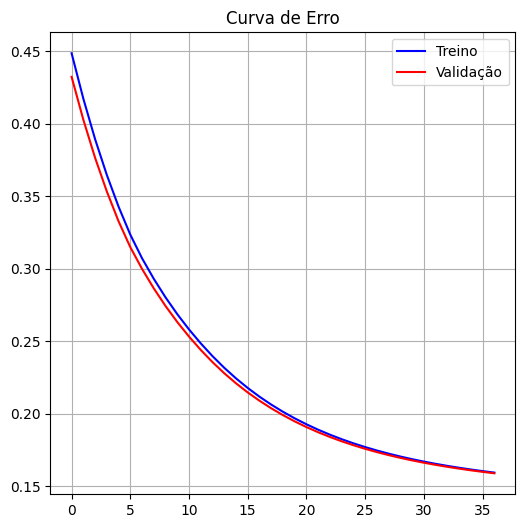

In [86]:
# Early Stop
early_stopping = EarlyStopping(patience=20, verbose=False)

tloss = []
vloss = []
for epoch in range(num_epochs):
    train_loss = model.train_model(train_loader)
    val_loss = model.validate_model(val_loader)
    tloss.append(train_loss)
    vloss.append(val_loss)
    if (epoch+1) % 10 == 0:
        print(f"Época {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Curva de Erro")
ax.plot(tloss,'blue', label='Treino')
ax.plot(vloss,'red', label='Validação')
ax.legend()
ax.grid(True)
plt.show()

### Test process

In [87]:
Yp, Yt, total_loss = model.test_model(test_dataset)

/home/mcerque2/projects/personal/venvs/mlp/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [88]:
Yp[-100:]

tensor([0.0237, 0.0243, 0.0238, 0.0241, 0.0247, 0.0237, 0.0239, 0.0247, 0.0245,
        0.0238, 0.0241, 0.0242, 0.0240, 0.0245, 0.0237, 0.0242, 0.0243, 0.0242,
        0.0240, 0.0241, 0.0238, 0.0247, 0.0236, 0.0238, 0.0236, 0.0244, 0.0237,
        0.0247, 0.0236, 0.0239, 0.0243, 0.0242, 0.0235, 0.0238, 0.0241, 0.0237,
        0.0247, 0.0237, 0.0238, 0.0240, 0.0238, 0.0246, 0.0245, 0.0236, 0.0249,
        0.0238, 0.0241, 0.0245, 0.0240, 0.0239, 0.0242, 0.0241, 0.0241, 0.0242,
        0.0240, 0.0237, 0.0243, 0.0238, 0.0237, 0.0243, 0.0245, 0.0241, 0.0239,
        0.0237, 0.0242, 0.0242, 0.0239, 0.0236, 0.0242, 0.0241, 0.0242, 0.0238,
        0.0246, 0.0239, 0.0237, 0.0241, 0.0240, 0.0238, 0.0247, 0.0245, 0.0242,
        0.0247, 0.0238, 0.0240, 0.0236, 0.0240, 0.0238, 0.0241, 0.0238, 0.0248,
        0.0242, 0.0240, 0.0237, 0.0238, 0.0244, 0.0241, 0.0242, 0.0245, 0.0236,
        0.0243])

(array([6.700e+01, 1.620e+03, 8.639e+03, 7.078e+03, 4.712e+03, 2.070e+03,
        5.710e+02, 1.190e+02, 2.500e+01, 4.000e+00]),
 array([0.02294111, 0.02325866, 0.02357621, 0.02389377, 0.02421132,
        0.02452887, 0.02484643, 0.02516398, 0.02548153, 0.02579908,
        0.02611664]),
 <BarContainer object of 10 artists>)

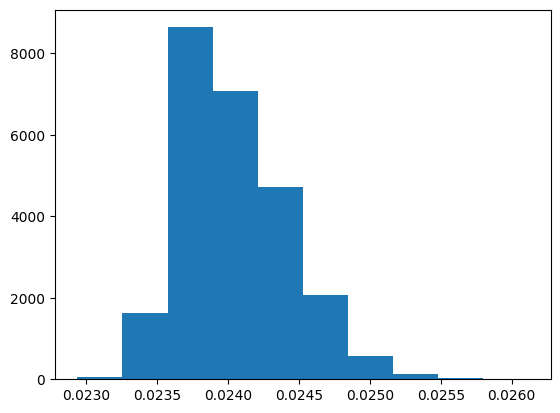

In [89]:
plt.hist(Yp)

In [90]:
from sklearn.metrics import classification_report, roc_auc_score
Yp_rounded = np.rint(Yp)
print(classification_report(y_true=Yt, y_pred=Yp_rounded))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     21370
         1.0       0.00      0.00      0.00      3535

    accuracy                           0.86     24905
   macro avg       0.43      0.50      0.46     24905
weighted avg       0.74      0.86      0.79     24905



/home/mcerque2/projects/personal/venvs/mlp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mcerque2/projects/personal/venvs/mlp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mcerque2/projects/personal/venvs/mlp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [91]:
np.array(Yp_rounded).sum()

0.0

In [92]:
print(roc_auc_score(y_true=Yt, y_score=Yp))

0.5997870482950427


pred = []
targets = []


for tensor, target in test_dataset:

    pred.append(model.forward(tensor.cuda()))
    targets.append(target.item())


Yp_rounded = np.rint(pred)
print(classification_report(y_true=targets, y_pred=Yp_rounded))

print(roc_auc_score(y_true=Yt, y_score=Yp))